In [25]:
#Harsh Soni
#DASC 5300

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Vehicles.csv" ) # Read CSV files

In [27]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE']) #converting CRASH_DATE to datetime
start_date = '2018-10-01' # Start date according to parameter
end_date = '2020-09-30' # End date of parameter
mvc_data = df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date') # Query that extract data of given year
mvc_data.to_csv('MVC.csv') # write that extracting year to csv file

In [28]:
df = pd.read_csv('MVC.csv') # Read Yearwise csv file from google drive 
df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,2006.0,North,2.0,F,Licensed,PA,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,South,1.0,M,Licensed,NY,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2018.0,North,3.0,F,Licensed,NY,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified


In [29]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE']) 
df['YEAR'], df['MONTH'] =df ['CRASH_DATE'].dt.year, df['CRASH_DATE'].dt.month # Extract Year and Month from csv file
df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT-TRUCK/BUS,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW -CAR/SUV,NaN,2006.0,North,2.0,F,Licensed,PA,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
3,14,19694316,4322767,2020-06-06,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,South,1.0,M,Licensed,NY,Going Straight Ahead,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020,6
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2018.0,North,3.0,F,Licensed,NY,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10


In [30]:
df = df.dropna(subset=['VEHICLE_MAKE']) # Drop rows that contain NULL values from 'VEHICLE_MAKE' column
df = df.dropna(subset=['VEHICLE_TYPE']) # Drop rows that contain NULL values from 'VEHICLE_TYPE' column

In [31]:
def clean_VehMake(vehicle_name): 
   if re.search('\-.*', vehicle_name): 
     pos = re.search('\-.*', vehicle_name).start()
     return vehicle_name[:pos]
   else:
     return vehicle_name 
df['VEHICLE_MAKE'] = df['VEHICLE_MAKE'].apply(clean_VehMake)
df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
0,1,19140702,4213082,2019-09-23,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT,NaN,2002.0,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2019,9
1,6,19138701,4229067,2019-10-24,13:15,c53b43d9-419a-4ab1-9361-3f2979078d89,NY,Bus,FRHT,NaN,2006.0,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
2,13,19140791,4229563,2019-10-21,17:55,86a294b4-6672-4a7e-8357-39d6d2eff9f7,PA,Sedan,BMW,NaN,2006.0,North,2.0,F,Licensed,PA,Going Straight Ahead,Center Front End,Right Front Bumper,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
4,19,19140656,4229538,2019-10-24,17:30,70e5262a-bd27-48a6-99a1-1ec659804088,NY,Station Wagon/Sport Utility Vehicle,JEEP,NaN,2018.0,North,3.0,F,Licensed,NY,Going Straight Ahead,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
5,20,19139721,4228839,2019-10-24,16:00,5bb0b59a-ce74-4a04-9f92-1446ebfe4f46,NC,Sedan,TOYT,NaN,1990.0,South,1.0,M,Licensed,NC,Going Straight Ahead,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10


# Analysis 1:
For the make of the vehicles (using the VEHICLE_MAKE attribute) to be processed by
each team, count the number of accidents that each one of those vehicles make were
involved in for each of the years given to you (in the parameter file). Plot them as a bar
graph with vehicle_make on the X-axis and count on the Y-axis. For each vehicle make,
there will be two bars and year can be shown at the top of the bar. This can also be
visualized in other ways. Analyze the vehicle makes for smallest and largest counts using
data from the i.


## Result:

- HOND has the highest accident count (80,069), with a sharp peak in 2019 (47,595), followed by a drop in 2020 (19,034).
- SUZI has the lowest accident numbers across all years, with 2019 showing the highest count (511).
- MITS and CADI also peaked in 2019
- 2020 saw a sharp decline in accidents for all vehicle makes, likely due to COVID-19 restrictions and reduced traffic.

### Potential Reasons for 2019 Peak:

- Increased vehicle sales or more active drivers on the road.
- Potential environmental or policy factors affecting traffic and accident rates.
- Higher traffic congestion leading to a spike in collisions.


### Potential Reasons for 2020 Drop:

- COVID-19 lockdowns led to fewer vehicles on the road.
- Work-from-home culture reduced commuting-related accidents.
-Travel restrictions and economic slowdowns affected vehicle movement.nternet

In [32]:
vehicle_company = ['HOND ', 'SUZI ', 'MITS ','CADI '] # Extracting data of parameter (HOND,SUZU,MITS,CADI)
df = df[df['VEHICLE_MAKE'].isin(vehicle_company)] 
df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
11,43,19140446,4229127,2019-10-24,20:30,c1353cd0-388f-4e93-887d-6743b7599d2b,NY,Sedan,HOND,NaN,2017.0,West,1.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
12,45,19140792,4229563,2019-10-21,17:55,ca744068-6013-47f0-a661-a0fbb579eb47,NM,Station Wagon/Sport Utility Vehicle,HOND,NaN,2003.0,West,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Center Front End,Center Front End,Left Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
13,48,19139096,4229018,2019-10-24,21:55,6ce523e1-6a14-4bcb-8e98-b2bdc5a74542,NY,Sedan,HOND,NaN,2018.0,South,3.0,M,Licensed,NY,Going Straight Ahead,Center Front End,Left Front Bumper,Right Front Bumper,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Traffic Control Disregarded,2019,10
26,92,19139241,4228592,2019-10-24,7:40,48ae5413-c7b5-460d-9faf-779de08209dc,NY,Station Wagon/Sport Utility Vehicle,HOND,NaN,2018.0,West,2.0,F,Licensed,NY,Making Right Turn,Right Rear Quarter Panel,Right Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
29,100,19138926,4228939,2019-10-24,15:30,880a9965-6e28-41b2-93c1-59d3b56dd3b2,NJ,Sedan,HOND,NaN,2008.0,North,1.0,M,Licensed,NJ,Going Straight Ahead,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10


In [33]:
df_vehicle = df[['CRASH_DATE','VEHICLE_MAKE','YEAR','MONTH']]


In [34]:
df_vehicle.head(5)

,CRASH_DATE,VEHICLE_MAKE,YEAR,MONTH
11,2019-10-24,HOND,2019,10
12,2019-10-21,HOND,2019,10
13,2019-10-24,HOND,2019,10
26,2019-10-24,HOND,2019,10
29,2019-10-24,HOND,2019,10


In [35]:
df1 = df_vehicle.groupby(['VEHICLE_MAKE', 'YEAR']).size().reset_index(name='COUNT')
df1 = df1.set_index(['VEHICLE_MAKE', 'YEAR'])
df1

COUNT
VEHICLE_MAKE YEAR       
CADI         2018    847
             2019   3065
             2020   1175
HOND         2018  13440
             2019  47595
             2020  19034
MITS         2018    645
             2019   2395
             2020   1015
SUZI         2018    127
             2019    511
             2020    311

In [36]:
df1 = df1.reset_index()
df1['YEAR'] = df1['YEAR'].astype(str)

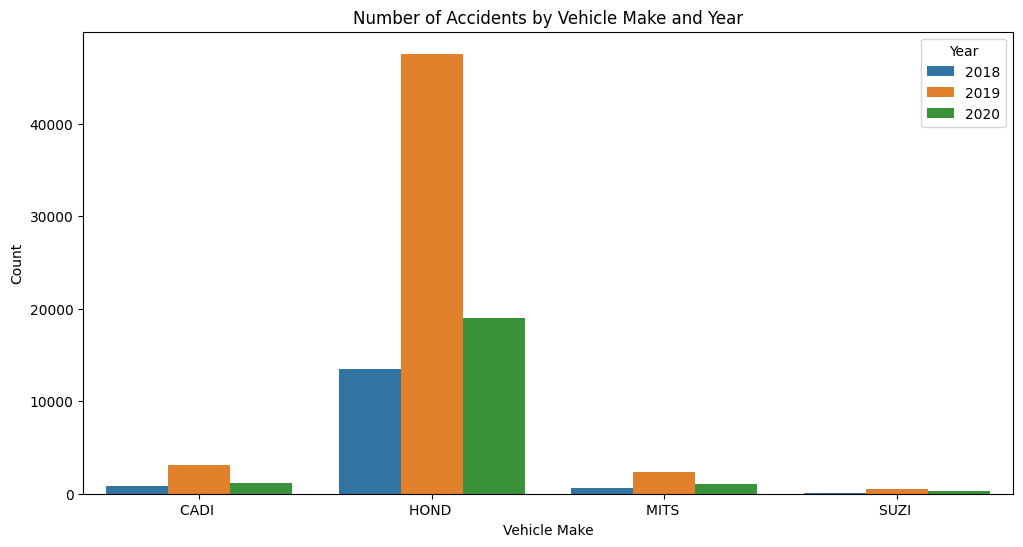

In [37]:
#bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='VEHICLE_MAKE', y='COUNT', hue='YEAR')
plt.xlabel("Vehicle Make")
plt.ylabel("Count")
plt.title("Number of Accidents by Vehicle Make and Year")
plt.legend(title="Year")
plt.show()


# Analysis 2:
Compare monthly accidents (# of accidents in each month) for each vehicle make (using
the vehicle_make attribute) for given years (given to you in the parameter file). Plot
them as a line graph for each vehicle make for every month (as X-axis) and count as Y- axis.
Analyse whether some months are more accident prone than others? Try to justify
your findings with data (summer vs winter months, holidays/long weekends, snow
season in New York City, any other events that happen in New York City for that given year using data from the internet). This is another visualization using different aggregate


## Result:

## The monthly breakdown reveals accident seasonality patterns:

- Winter months (Nov – Feb) show fluctuations, likely due to icy roads, poor visibility, and bad weather.
- Summer months (June – August) also have moderate accident peaks, possibly due to increased travel and vacations.
- Early months of 2020 (Jan – March) still had significant accidents, but a sharp decline occurred from April onwards (lockdowns).values.

In [38]:
monthly_vehicle_df = df_vehicle.groupby(['VEHICLE_MAKE','YEAR','MONTH']).size().reset_index(name='COUNT')
pd.set_option('display.max_rows', None)
monthly_vehicle_df.head(5)

,VEHICLE_MAKE,YEAR,MONTH,COUNT
0,CADI,2018,10,285
1,CADI,2018,11,288
2,CADI,2018,12,274
3,CADI,2019,1,235
4,CADI,2019,2,229


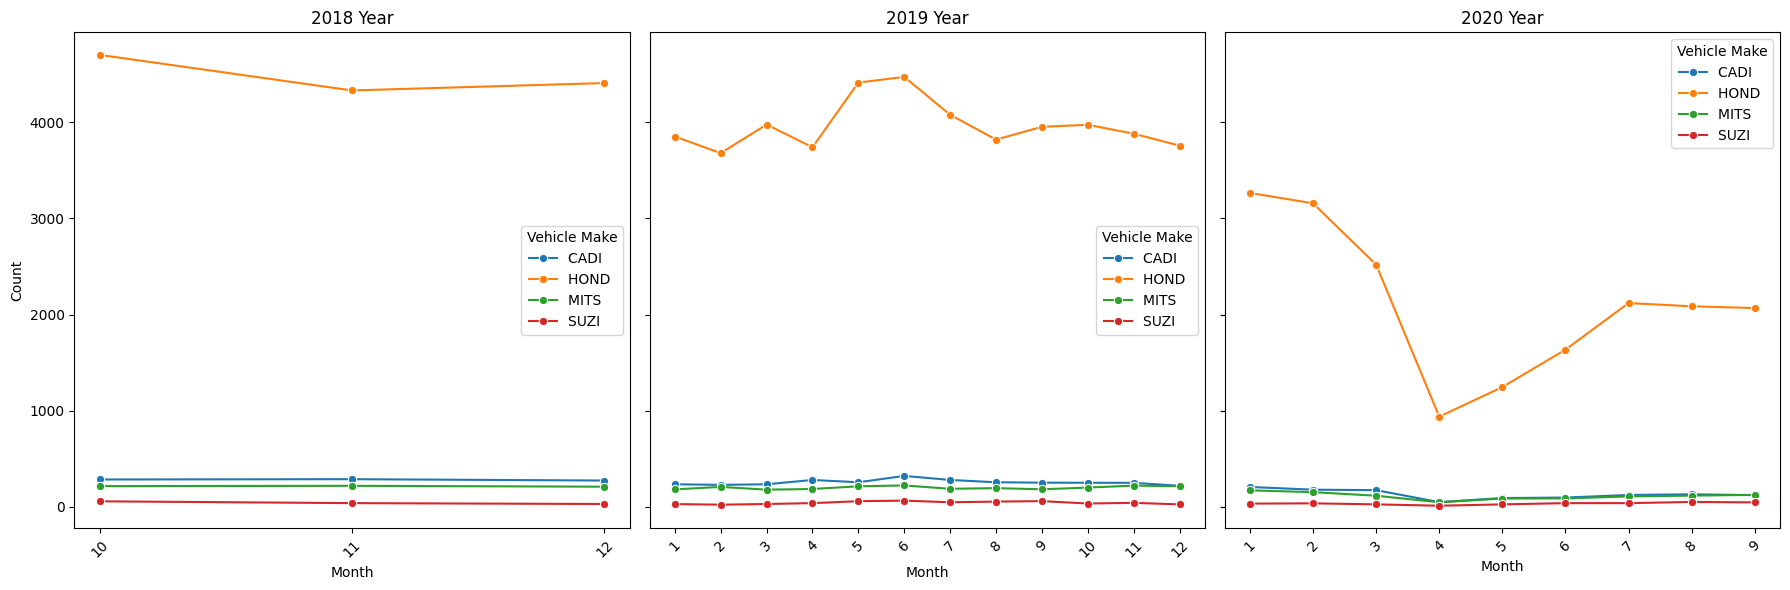

In [39]:
monthly_vehicle_df['YEAR'] = monthly_vehicle_df['YEAR'].astype(str)
monthly_vehicle_df['MONTH'] = pd.Categorical(monthly_vehicle_df['MONTH'].astype(str), 
                                             categories=[str(i) for i in range(1, 13)], ordered=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, year in enumerate(['2018', '2019', '2020']):
    subset = monthly_vehicle_df[monthly_vehicle_df['YEAR'] == year]  # Filter data for the year
    
    if subset.empty:
        print(f"No data available for year {year}")  # Skip if no data exists for a year
        continue  

    ax = axes[i]
    sns.lineplot(data=subset, x='MONTH', y='COUNT', hue='VEHICLE_MAKE', marker='o', ax=ax)
    ax.set_title(f"{year} Year")
    ax.set_xlabel("Month")
    ax.set_ylabel("Count")
    ax.legend(title="Vehicle Make")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


6.3 Data Analysis 3

# Analysis 3:
For each type of vehicle (using the vehicle_type attribute) given in the parameters file,
plot the count as a percentage of crashes each unique type of vehicle was involved in.
You can visualize this using a pie chart. Below is the sample visualization for the whole
dataset (you will have to clean your data of “no value”/unknown and merge similar
types such as TAXI and Taxi). Analyze the result in any way possible using data from the
internet. if a specific vehicle type is more likely to be involved in an accident using the
total number of such vehicles.

## Result:

- Sedans (52,503 accidents) have the highest accident rate, likely due to their popularity.
- SUVs (34,047 accidents) are the second most involved in crashes, potentially due to higher speeds and increased road presence.
- Taxis (1,982 accidents) have a notable share, likely because of high road exposure.
- Motorcycles (886 accidents) and Trucks (547 accidents) show relatively fewer accidents but could have higher severity.
- Bicycles (2 accidents) have the lowest representation.


In [40]:
#For Analysis 3, serching string from VEHICLE_TYPE and then merge to VEHICLE_TYPE 
df['VEHICLE_TYPE'].head(5)

11                                  Sedan
12    Station Wagon/Sport Utility Vehicle
13                                  Sedan
26    Station Wagon/Sport Utility Vehicle
29                                  Sedan
Name: VEHICLE_TYPE, dtype: object

In [41]:
# finds the location of string that contains string and that rename it to other. Example: Here, Station wagon /Sport Utility Vehicle and Rename to Sport Utility Vehicle 
df.loc[df['VEHICLE_TYPE'].str.contains('Station Wagon/Sport Utility Vehicle'), 'VEHICLE_TYPE'] = 'Sport Utility Vehicle'
df.loc[df['VEHICLE_TYPE'].str.contains('SPORT UTILITY / STATION'), 'VEHICLE_TYPE'] = 'Sport Utility Vehicle'
df.loc[df['VEHICLE_TYPE'].str.contains('TAXI'), 'VEHICLE_TYPE'] = 'Taxi'
df.loc[df['VEHICLE_TYPE'].str.contains('4 dr sedan'), 'VEHICLE_TYPE'] = 'Sedans'
df.loc[df['VEHICLE_TYPE'].str.contains('Sedan'), 'VEHICLE_TYPE'] = 'Sedans'
df.loc[df['VEHICLE_TYPE'].str.contains('2 dr sedan'), 'VEHICLE_TYPE'] = 'Sedans'
df.loc[df['VEHICLE_TYPE'].str.contains('Box Truck'), 'VEHICLE_TYPE'] = 'Truck'
df.loc[df['VEHICLE_TYPE'].str.contains('Pick-up Truck'), 'VEHICLE_TYPE'] = 'Truck'
df.loc[df['VEHICLE_TYPE'].str.contains('Minibike'), 'VEHICLE_TYPE'] = 'Bike'
df.loc[df['VEHICLE_TYPE'].str.contains('Motorbike'), 'VEHICLE_TYPE'] = 'Bike'
df.loc[df['VEHICLE_TYPE'].str.contains('Minicycle'), 'VEHICLE_TYPE'] = 'Bicycle'

In [42]:
#Making new dataframe that contains vehicle type
veh_type = ['Sedans', 'PASSENGER VEHICLE', 'Sport Utility Vehicle', 'Taxi','VAN' , 'Bike', 'Bus','Truck','Motorcycle','Bicycle'] 
veh_type_df = df[df['VEHICLE_TYPE'].isin(veh_type)]
veh_type_df.head(5)

,Unnamed: 0,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,YEAR,MONTH
11,43,19140446,4229127,2019-10-24,20:30,c1353cd0-388f-4e93-887d-6743b7599d2b,NY,Sedans,HOND,NaN,2017.0,West,1.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
12,45,19140792,4229563,2019-10-21,17:55,ca744068-6013-47f0-a661-a0fbb579eb47,NM,Sport Utility Vehicle,HOND,NaN,2003.0,West,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Center Front End,Center Front End,Left Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2019,10
13,48,19139096,4229018,2019-10-24,21:55,6ce523e1-6a14-4bcb-8e98-b2bdc5a74542,NY,Sedans,HOND,NaN,2018.0,South,3.0,M,Licensed,NY,Going Straight Ahead,Center Front End,Left Front Bumper,Right Front Bumper,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Traffic Control Disregarded,2019,10
26,92,19139241,4228592,2019-10-24,7:40,48ae5413-c7b5-460d-9faf-779de08209dc,NY,Sport Utility Vehicle,HOND,NaN,2018.0,West,2.0,F,Licensed,NY,Making Right Turn,Right Rear Quarter Panel,Right Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10
29,100,19138926,4228939,2019-10-24,15:30,880a9965-6e28-41b2-93c1-59d3b56dd3b2,NJ,Sedans,HOND,NaN,2008.0,North,1.0,M,Licensed,NJ,Going Straight Ahead,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2019,10


In [43]:
all_VehiTyp_count = veh_type_df['VEHICLE_TYPE'].value_counts() # count number of accidents by specific vehicle type
all_VehiTyp_count_df= pd.DataFrame({'TYPE':all_VehiTyp_count.index, 'Accidents':all_VehiTyp_count.values}) # making new data frame that contains type of vehicles and number of accidents.
labels = all_VehiTyp_count_df['TYPE']
a1=all_VehiTyp_count_df.Accidents
all_VehiTyp_count_df


,TYPE,Accidents
0,Sedans,52503
1,Sport Utility Vehicle,34047
2,Taxi,1982
3,Motorcycle,886
4,Truck,547
5,Bike,56
6,Bicycle,2


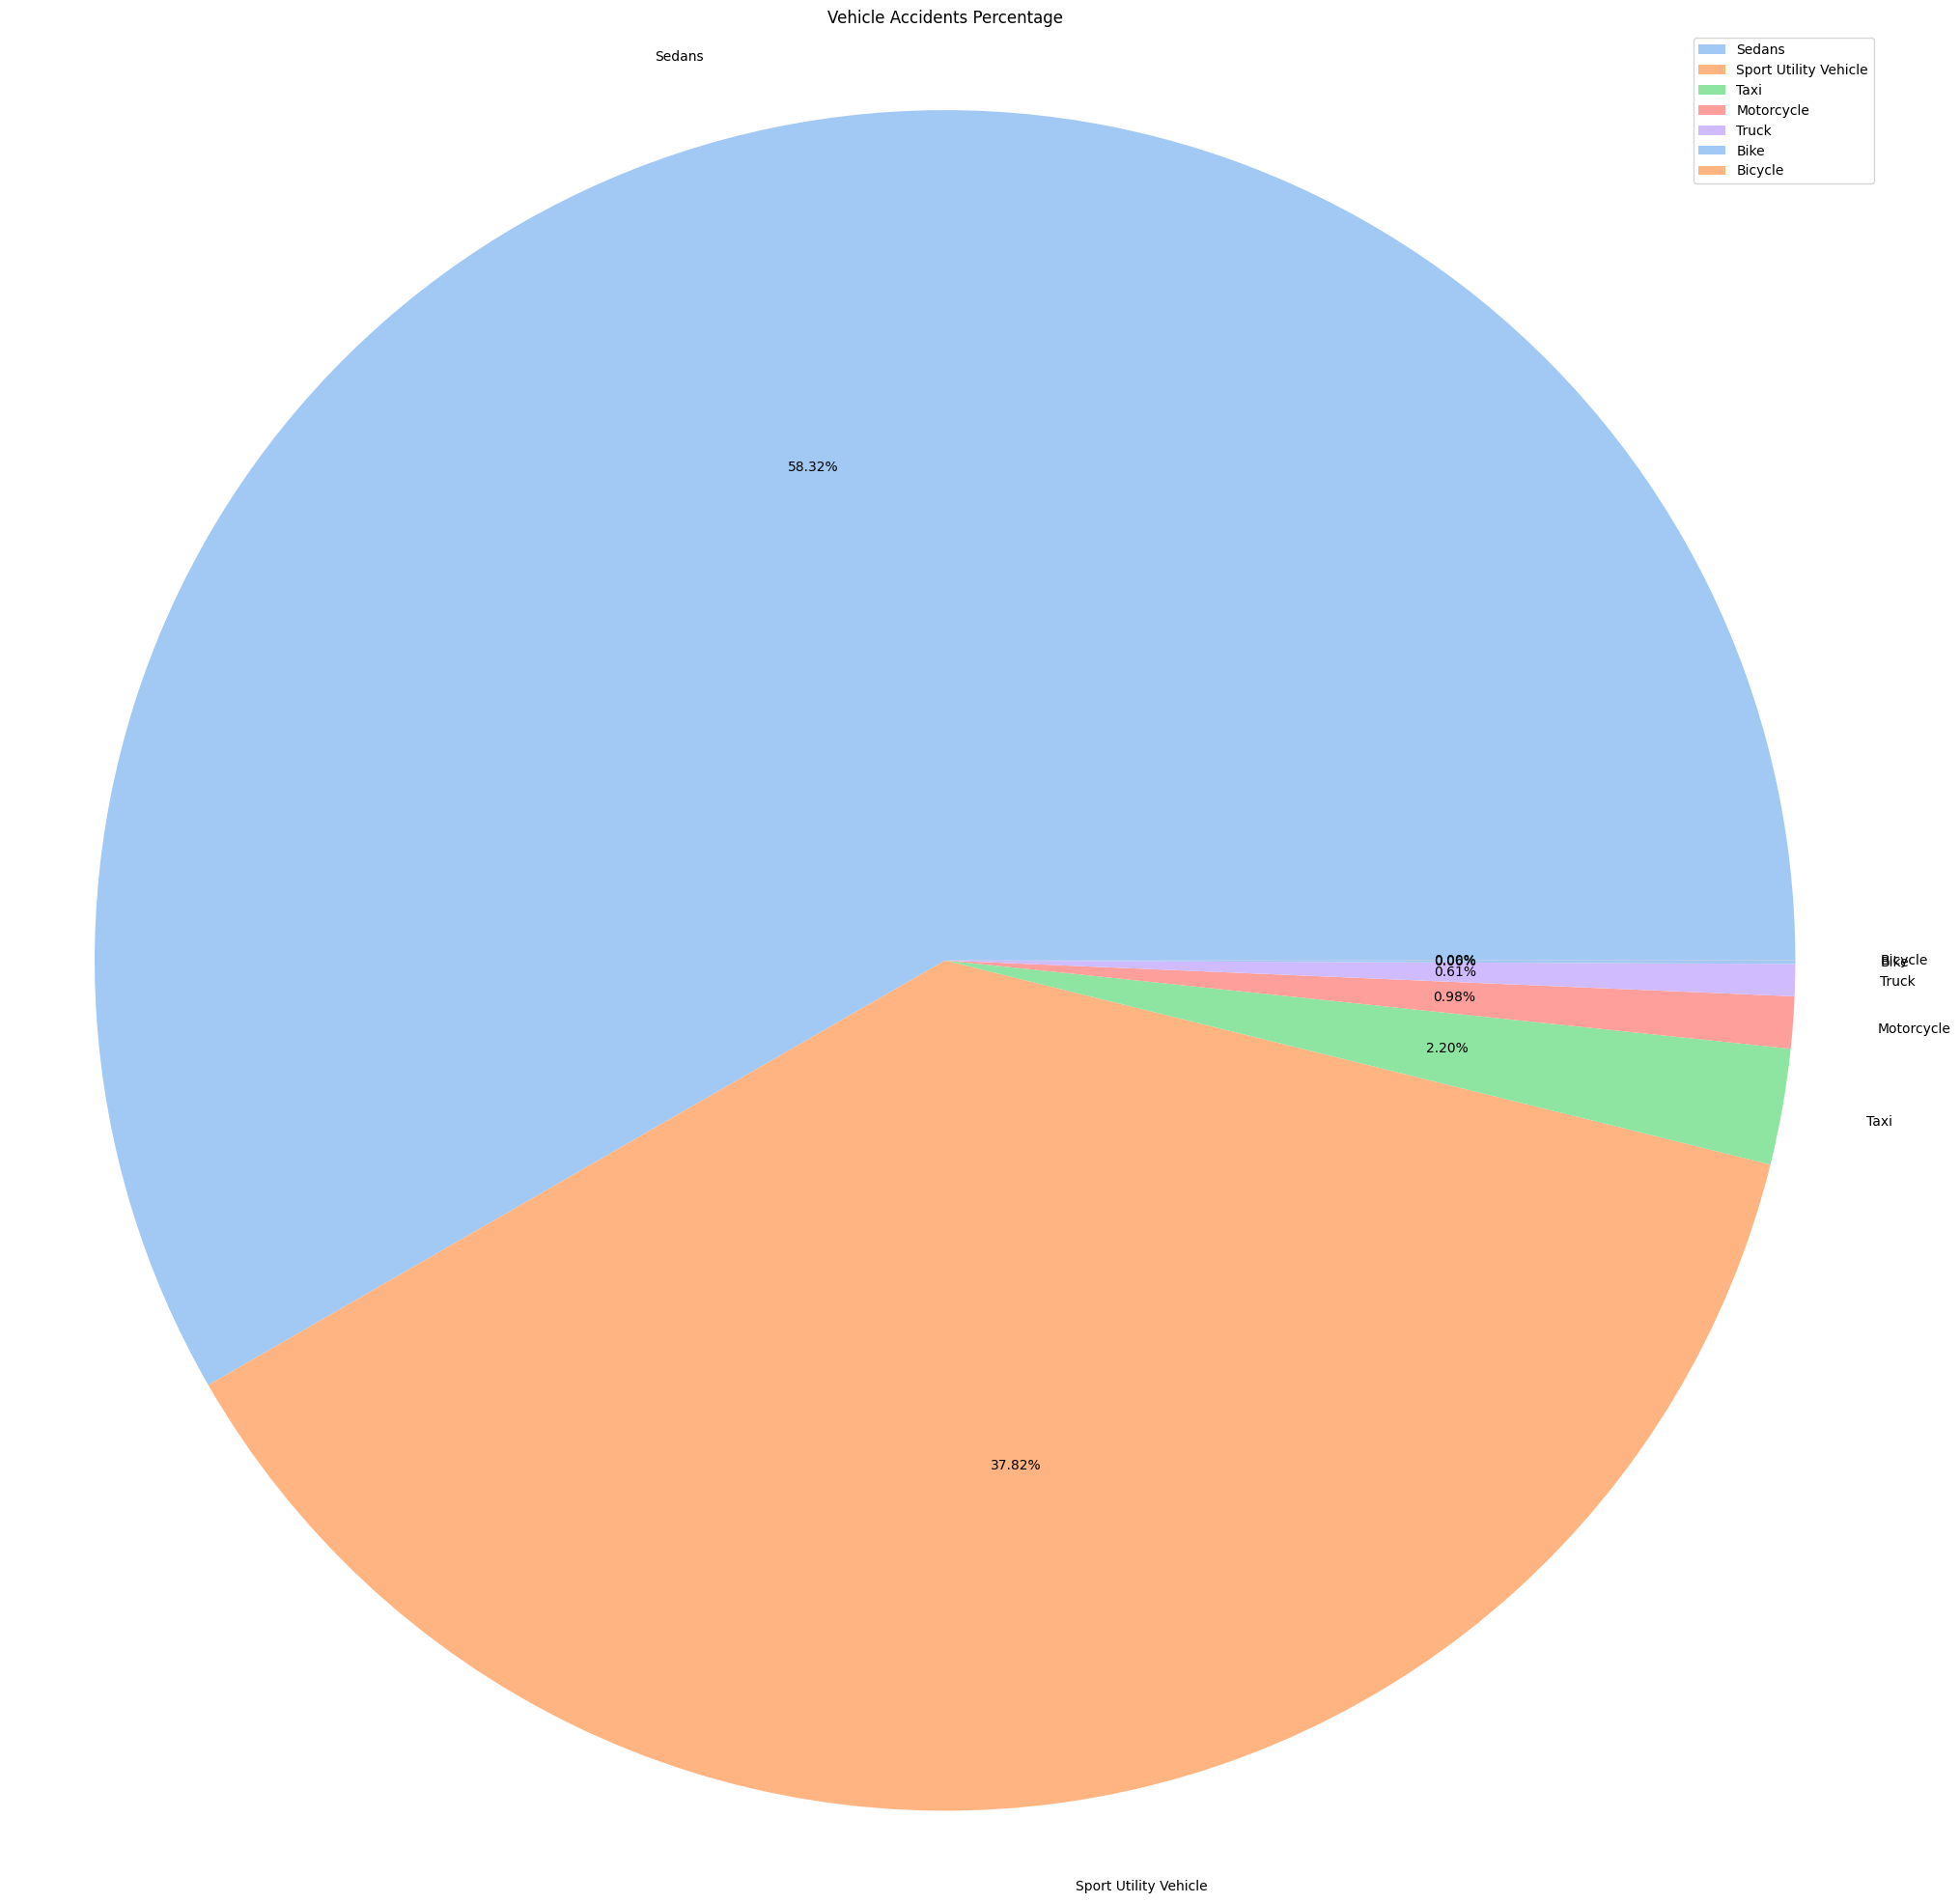

In [44]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(25,25))
plt.pie(x = a1 , autopct="%1.2f%%", labels=labels , colors=colors, radius = 2) # plotting pie chart
plt.title("Vehicle Accidents Percentage")
plt.axis('equal')
plt.legend()
plt.show()